In [1]:
import pandas as pd
import glob
import scipy
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
# все сгенерированные стихи с gpt_lp
all_generated_lp = glob.glob('generated_poems/with_lp/*')

markov_path = [x for x in all_generated_lp if x.find("markov") >= 0]
lstm_emb_path = [x for x in all_generated_lp if x.find("lstm") >= 0 and x.find("emb") > 0]
lstm_path = [x for x in all_generated_lp if x.find("lstm") >= 0 and x.find("emb") == -1]

In [3]:
def read_data(path_list):
    data = pd.DataFrame(columns=['gpt_lp'])
    for path in path_list:
        new_data = pd.read_csv(path, usecols=['gpt_lp'])
        data = pd.concat([data, new_data])
    return np.array(data['gpt_lp'])

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m, m+h

In [4]:
#сэмпл реальных стихов
data_real = np.array(pd.read_csv('data/data_sample_lp.csv', usecols=['gpt_lp'])['gpt_lp'])

#сгенерированные
data_markov = read_data(markov_path)
data_lstm_emb = read_data(lstm_emb_path)
data_lstm = read_data(lstm_path)

In [5]:
real_confint = mean_confidence_interval(data_real)
markov_confint = mean_confidence_interval(data_markov)
lstm_emb_confint = mean_confidence_interval(data_lstm_emb)
lstm_confint = mean_confidence_interval(data_lstm)

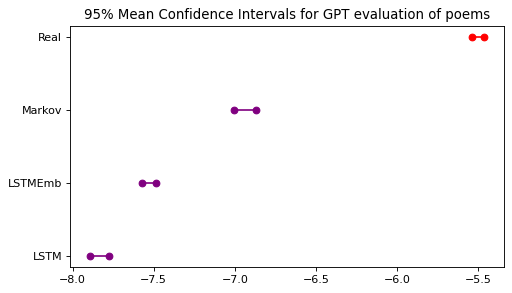

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4), dpi=80)
plt.plot((lstm_confint[0], lstm_confint[2]), ('LSTM', 'LSTM'), 'ro-',color='purple')
plt.plot((lstm_emb_confint[0], lstm_emb_confint[2]), ('LSTMEmb', 'LSTMEmb'), 'ro-',color='purple')
plt.plot((markov_confint[0], markov_confint[2]), ('Markov', 'Markov'), 'ro-',color='purple')
plt.plot((real_confint[0], real_confint[2]), ('Real', 'Real'), 'ro-',color='red')

plt.title('95% Mean Confidence Intervals for GPT evaluation of poems')
plt.yticks([0, 1, 2, 3], ['LSTM', 'LSTMEmb', 'Markov', 'Real'])
plt.show()

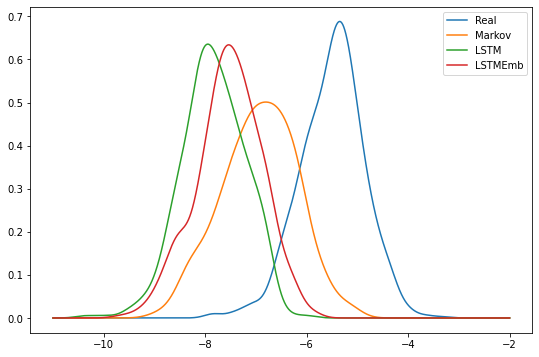

In [9]:
plt.figure(figsize=(9, 6))

x = np.arange(-11, -2, 0.001)
plt.plot(x, stats.gaussian_kde(data_real)(x), label="Real")
plt.plot(x, stats.gaussian_kde(data_markov)(x), label="Markov")
plt.plot(x, stats.gaussian_kde(data_lstm)(x), label="LSTM")
plt.plot(x, stats.gaussian_kde(data_lstm_emb)(x), label="LSTMEmb")

plt.legend()
plt.show()